In [1]:
import matplotlib.pyplot as plt
from utils import *

In [2]:
model_base_dir = "/Users/maxwellmb/Data/models/ATMO_2020_models/evolutionary_tracks/ATMO_CEQ/"

instrument="miri"

instrument_directories= {'nircam':"JWST_coronagraphy/",
                         'miri':"JWST_coronagraphy/JWST_coron_MIRI/",
                        'nirc2':'MKO_WISE_IRAC/'}
instrument_mask = 'MASK335R'
nircam_mask_directories = {'mask210r':'JWST_coron_NIRCAM_MASK210R/',
                    'mask335r':'JWST_coron_NIRCAM_MASK335R/',
                    'mask430r':'JWST_coron_NIRCAM_MASK430R/',
                    'masklwb':'JWST_coron_NIRCAM_MASKLWD/',
                    'maskswb':'JWST_coron_NIRCAM_MASKSWB/',
                    }

filter_name = "F460M"
filter_name = "f2300c"

model_dir = model_base_dir

#If your instrument isn't there we'll assume it uses MKO_WISE_IREC filters
model_dir += instrument_directories.get(instrument.lower(),'MKO_WISE_IRAC/') 

if instrument.lower() == 'nircam':
    #If your instrument doesn't have a mask (pretty JWST specific)then assume there is no sub directory
    model_dir += nircam_mask_directories.get(instrument_mask.lower(),'') 


available_filters = get_available_filters(model_dir)
if filter_name.lower() not in available_filters:
    print("The chosen filter is not available in this instrument configuration")
    print("Please choose from:")
    print(available_filters)



In [3]:
masses, ages, mags = read_track_for_filter(model_dir,filter_name)

#Trim each array magnitudes array at indexes longer than len(atmo_ages) so they are even
# mags = [x[:len(ages[i])] for i,x in enumerate(mags)]

masses_size = len(masses)
ages_size = len(ages[0])

big_array = np.zeros([masses_size,ages_size,ages_size])

/Users/maxwellmb/Dropbox (Personal)/Library/Python/contraster/testing/utils.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(masses)[sorted_by_mass], np.array(age_list)[sorted_by_mass], np.array(mag_list)[sorted_by_mass]


In [4]:
ages[0]

array([  1.        ,   1.26638017,   1.60371874,   2.03091762,
         2.57191381,   3.25702066,   4.12462638,   5.22334507,
         6.61474064,   8.3767764 ,  10.6081836 ,  13.4339933 ,
        17.0125428 ,  21.5443469 ,  27.2833338 ,  34.5510729 ,
        43.7547938 ,  55.4102033 ,  70.1703829 ,  88.8623816 ,
       112.533558  , 142.510267  , 180.472177  , 228.546386  ,
       289.426612  ])

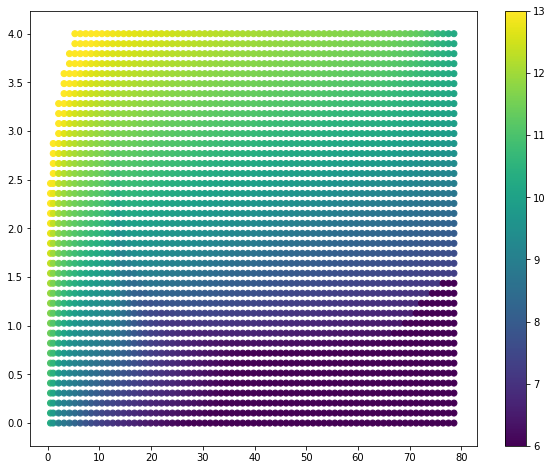

In [5]:
fig = plt.figure(figsize=(10,8))
# fig = plt.figure()

for i in range(masses_size):
    plt.scatter(np.repeat(masses[i],len(ages[i])),np.log10(ages[i]),c=mags[i],vmin=6,vmax=13)
plt.colorbar()

## Let's check that our interpolation

## Linear

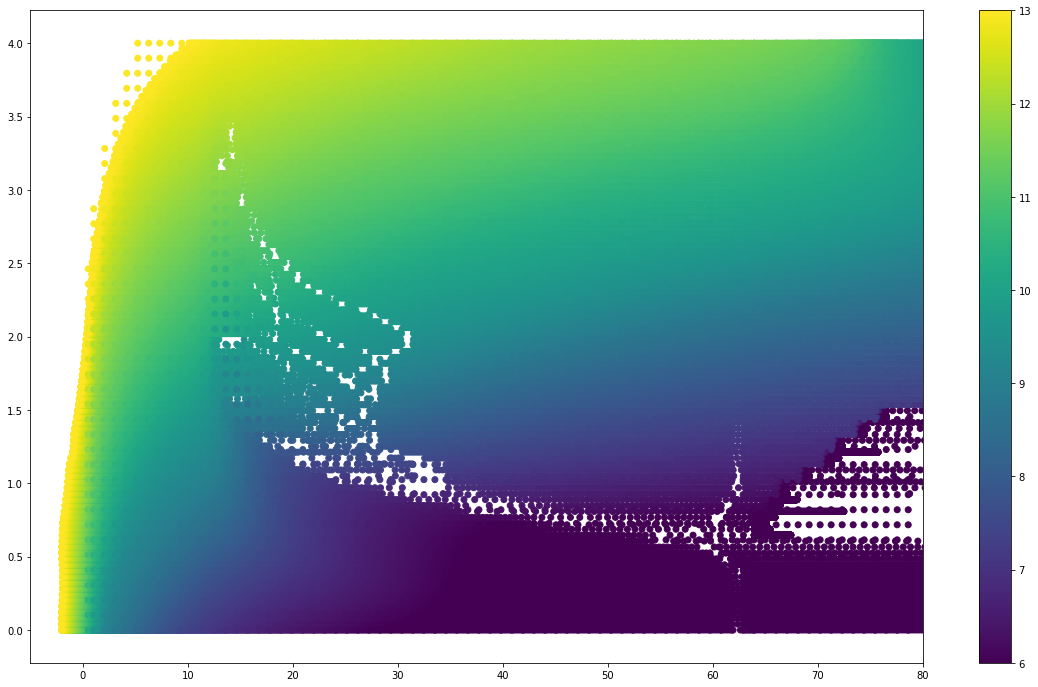

In [6]:
fig = plt.figure(figsize=(20,12))
# fig = plt.figure()

# for i in range(masses_size):
#     plt.scatter(np.repeat(masses[i],len(ages[i])),np.log10(ages[i]),c=mags[i],vmin=6,vmax=13)
# plt.colorbar()

for age in np.logspace(0.001,4,num=100):
    mass_func = get_mass_func_from_mag(age,10,masses, ages,mags,kind='linear')
    these_mags = np.linspace(0,13,num=2000)
    these_masses = mass_func(these_mags)
    plt.scatter(these_masses,np.repeat(np.log10(age),len(these_masses)),c=these_mags,vmin=6,vmax=13)

plt.xlim(-5,80)

for i in range(masses_size):
    plt.scatter(np.repeat(masses[i],len(ages[i])),np.log10(ages[i]),
    c=mags[i],vmin=6,vmax=13)
plt.colorbar()

# Cubic

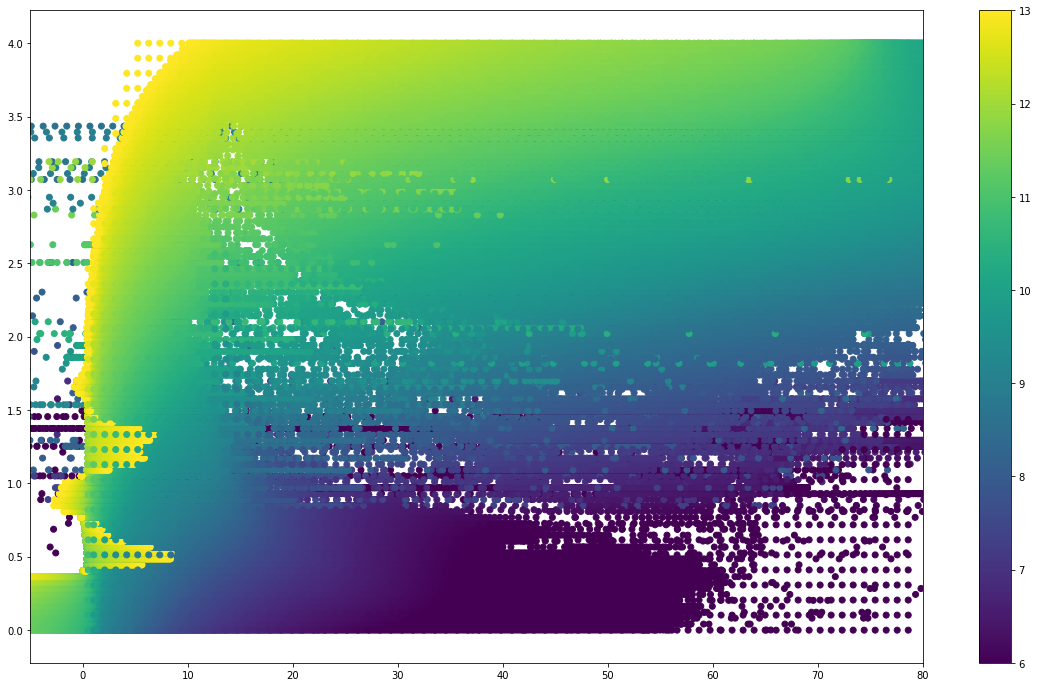

In [7]:
fig = plt.figure(figsize=(20,12))
# fig = plt.figure()

# for i in range(masses_size):
#     plt.scatter(np.repeat(masses[i],len(ages[i])),np.log10(ages[i]),c=mags[i],vmin=6,vmax=13)
# plt.colorbar()

for age in np.logspace(0.001,4,num=100):
    mass_func = get_mass_func_from_mag(age,10,masses, ages,mags,kind='cubic')
    these_mags = np.linspace(0,13,num=2000)
    these_masses = mass_func(these_mags)
    plt.scatter(these_masses,np.repeat(np.log10(age),len(these_masses)),c=these_mags,vmin=6,vmax=13)

plt.xlim(-5,80)

for i in range(masses_size):
    plt.scatter(np.repeat(masses[i],len(ages[i])),np.log10(ages[i]),
    c=mags[i],vmin=6,vmax=13)
plt.colorbar()

Ok well cubic is obviously a complete mess and linear looks decent for these purposes. Not perfect and not necessarily great for a paper, but decent enough! 

## What about the age, should it be in log or linear? 

## Linear

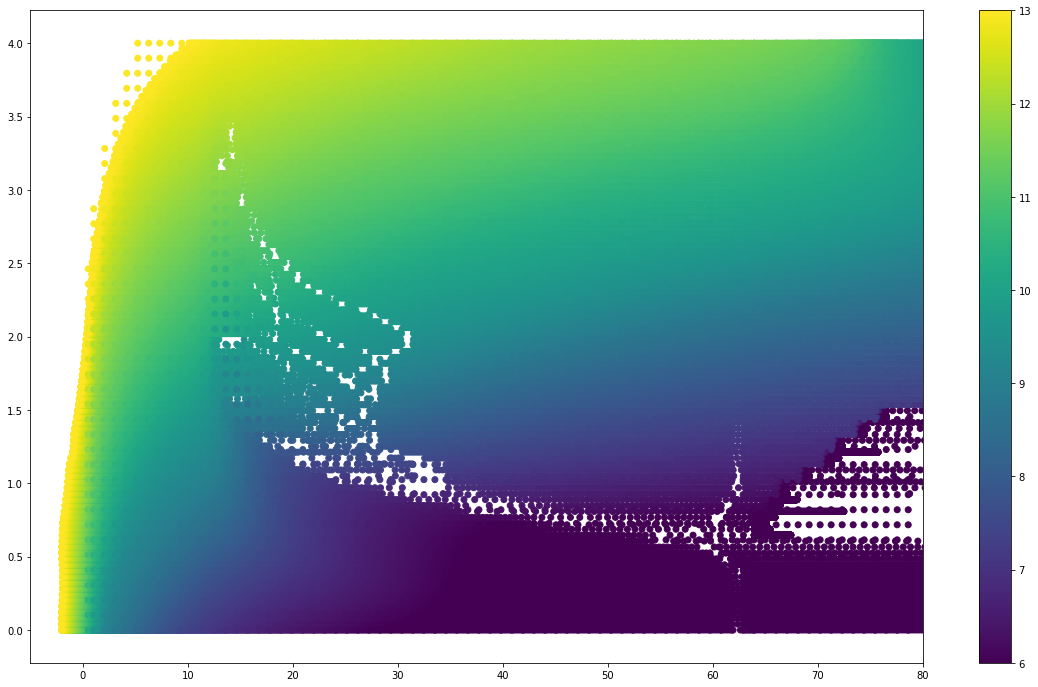

In [12]:
fig = plt.figure(figsize=(20,12))
# fig = plt.figure()

# for i in range(masses_size):
#     plt.scatter(np.repeat(masses[i],len(ages[i])),np.log10(ages[i]),c=mags[i],vmin=6,vmax=13)
# plt.colorbar()

for age in np.logspace(0.001,4,num=100):
    mass_func = get_mass_func_from_mag(age,10,masses, ages,mags,kind='linear',age_interp='linear')
    these_mags = np.linspace(0,13,num=2000)
    these_masses = mass_func(these_mags)
    plt.scatter(these_masses,np.repeat(np.log10(age),len(these_masses)),c=these_mags,vmin=6,vmax=13)

plt.xlim(-5,80)

for i in range(masses_size):
    plt.scatter(np.repeat(masses[i],len(ages[i])),np.log10(ages[i]),
    c=mags[i],vmin=6,vmax=13)
plt.colorbar()

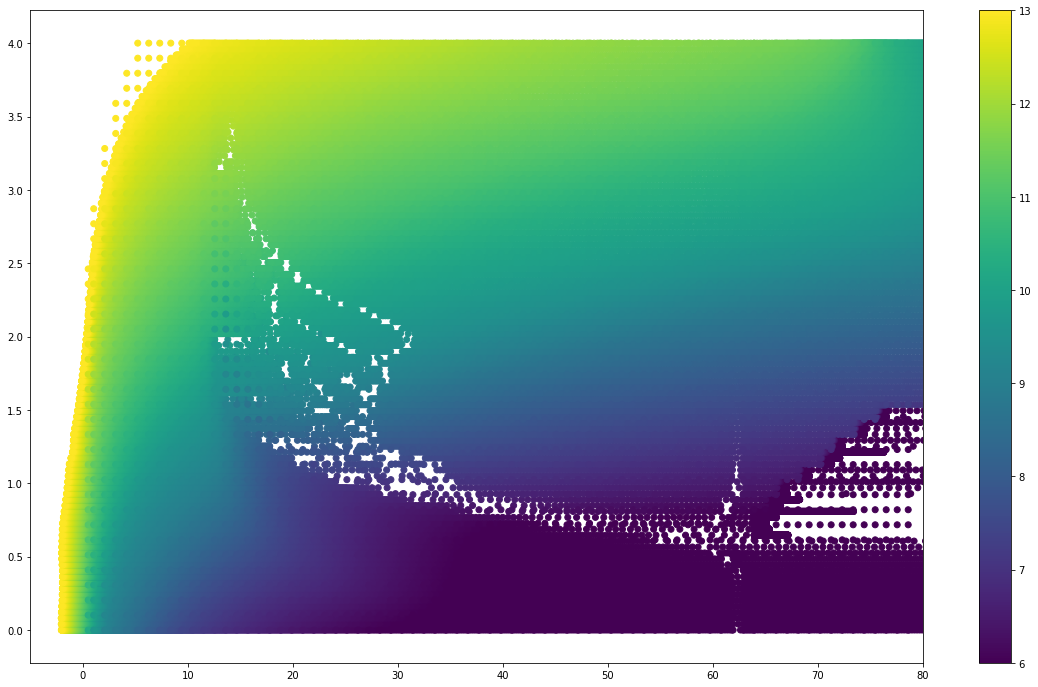

In [13]:
fig = plt.figure(figsize=(20,12))
# fig = plt.figure()

# for i in range(masses_size):
#     plt.scatter(np.repeat(masses[i],len(ages[i])),np.log10(ages[i]),c=mags[i],vmin=6,vmax=13)
# plt.colorbar()

for age in np.logspace(0.001,4,num=100):
    mass_func = get_mass_func_from_mag(age,10,masses, ages,mags,kind='linear',age_interp='log')
    these_mags = np.linspace(0,13,num=2000)
    these_masses = mass_func(these_mags)
    plt.scatter(these_masses,np.repeat(np.log10(age),len(these_masses)),c=these_mags,vmin=6,vmax=13)

plt.xlim(-5,80)

for i in range(masses_size):
    plt.scatter(np.repeat(masses[i],len(ages[i])),np.log10(ages[i]),
    c=mags[i],vmin=6,vmax=13)
plt.colorbar()

To be honest I don't see a big difference here. 